In [155]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Primer punto Preprocesamiento de datos 

In [266]:
train_identity = pd.read_csv("C:/Users/Carlos Vesga/OneDrive - Universidad del Norte/Escritorio/Machine Learning maestria/Fraud Detection/drive-download-20230930T132613Z-001/train_identity.csv")
train_transaction = pd.read_csv("C:/Users/Carlos Vesga/OneDrive - Universidad del Norte/Escritorio/Machine Learning maestria/Fraud Detection/drive-download-20230930T132613Z-001/train_transaction.csv")
data_train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [158]:
data_train.shape
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


Se observa que el df resultante tiene 434 columnas y 590.539 filas.

In [159]:
data_train.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [160]:
data_train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.0000

In [161]:
pd.set_option('display.max_rows', None)
data_train.columns


Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

In [162]:
print("# NaN values:", data_train.isna().sum().sum())

# NaN values: 115523073


In [163]:
train_NA = data_train.isna().sum()
pd.set_option('display.max_rows', 10)
pd.concat([train_NA], axis=1, sort = False, keys = ['Train NA'])

,Train NA
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
id_36,449555
id_37,449555
id_38,449555
DeviceType,449730


## Eliminar NaN

Observamos que existen columnas con un porcentaje de faltantes muy altas, para no generar sesgos mas adelante se tomo la desicion de eliminar todas las columnas con un porcentaje de faltantes mayor al 70%, se hace lo mismo para las filas.

In [164]:
p1 = len(data_train)*.70
data_int = data_train.dropna(axis=1,thresh=p1)
p2 = len(data_int.columns)*.70
data_new = data_int.dropna(axis=0,thresh=p2)

In [165]:
New_NA = data_new.isna().sum()
pd.set_option('display.max_rows', 15)
pd.concat([New_NA], axis=1, sort = False, keys = ['New NA'])

,New NA
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
V317,9
V318,9
V319,9
V320,9


In [166]:
data_new.shape
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517591 entries, 0 to 590539
Columns: 202 entries, TransactionID to V321
dtypes: float64(193), int64(4), object(5)
memory usage: 801.6+ MB


Observamos que el numero de columnas baja a 202 y el numero de datos a 517591.

## Crear Dummies

Tenemos 5 columnas categoricas, las cuales transformaremos a dummies.

In [167]:
data_new.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V317              float64
V318              float64
V319              float64
V320              float64
V321              float64
Length: 202, dtype: object

In [168]:
for c in data_new.columns:
    if (data_new[c].dtype == 'O'):
          print(c, data_new[c].dtype)

ProductCD object
card4 object
card6 object
P_emaildomain object
M6 object


In [169]:
vector_objecto = np.array(['ProductCD','card4','card6','P_emaildomain','M6'])
print(vector_objecto)

['ProductCD' 'card4' 'card6' 'P_emaildomain' 'M6']


In [170]:
# Creamos las variables binarias
for c in vector_objecto:
    dummies = pd.get_dummies(data_new[c], drop_first = True)
    data_new = pd.concat([data_new, dummies], axis = 1)
    data_new = data_new.drop(columns=[c])



In [171]:
data_new.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,H,R,S,W,discover,mastercard,visa,credit,debit,debit or credit,anonymous.com,aol.com,att.net,bellsouth.net,cableone.net,centurylink.net,cfl.rr.com,charter.net,comcast.net,cox.net,earthlink.net,embarqmail.com,frontier.com,frontiernet.net,gmail,gmail.com,gmx.de,hotmail.co.uk,hotmail.com,hotmail.de,hotmail.es,hotmail.fr,icloud.com,juno.com,live.com,live.com.mx,live.fr,mac.com,mail.com,me.com,msn.com,netzero.com,netzero.net,optonline.net,outlook.com,outlook.es,prodigy.net.mx,protonmail.com,ptd.net,q.com,roadrunner.com,rocketmail.com,sbcglobal.net,sc.rr.com,servicios-ta.com,suddenlink.net,twc.com,verizon.net,web.de,windstream.net,yahoo.co.jp,yahoo.co.uk,yahoo.com,yahoo.com.mx,yahoo.de,yahoo.es,yahoo.fr,ymail.com,T
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [172]:
data_new.shape

(517591, 266)

### Imputacion de datos faltantes usando la mediana

Observamos que existen una gran candidad de datos faltantes, los cuales dificultan realizar un EDA apropiado. por lo cual vamos a usar tecnicas de imputacion para rellenar los datos faltantes.

In [173]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data_new)
SimpleImputer()

SimpleImputer()

In [191]:
data_new.dropna(inplace=True)

## Características Fraud Detection

TransactionDT: Intervalo de tiempo a partir de una fecha y hora de referencia

TransactionAMT: Importe del pago de la transacción en USD

ProductCD: Código de producto, el producto de cada transacción

card1 - card6 : Información de la tarjeta de pago, como tipo de tarjeta, categoría de tarjeta, banco
emisor, país, etc.

addr : Dirección

dist: Distancia

P_ and (R_) emaildomain: Dominio de correo electrónico del comprador y del destinatario

C1-C14 : Recuento, cuántas direcciones se encuentran asociadas a la tarjeta de pago, etc. El significado
real está codificado.

D1-D15 : Intervalo de tiempo, como los días transcurridos entre la transacción anterior, etc.

M1-M9 : Coinciden, como los nombres en la tarjeta y la dirección, etc.

Vxxx : Vesta ofrece una gran variedad de funciones, como la clasificación, el recuento y otras relaciones
entre entidades.

DeviceType: Codificada. Información de identidad o conexión de red (IP, ISP, Proxy, etc) o firma digital

DeviceInfo: Codificada. Información de identidad o conexión de red (IP, ISP, Proxy, etc) o firma digital

id_12 - id_38 : Codificada. Información de identidad o conexión de red (IP, ISP, Proxy, etc) o firma
digital

# EDA

In [174]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 

In [192]:
data_new.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,3.469100e+05,346910.000000,3.469100e+05,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.00000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000,346910.000000
mean,3.301375e+06,0.020011,7.872596e+06,156.498719,9941.604229,353.127941,150.263423,202.374994,289.854579,86.742887,9.067078,8.418391,0.000014,0.159197,7.360315,6.779600,0.137119,0.207071,5.844620,0.227001,6.550079,0.265023,35.57299,7.379508,111.620360,155.729074,137.973247,178.149572,0.655648,0.700862,0.999813,0.010103,0.011666,0

In [193]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346910 entries, 1 to 590539
Columns: 266 entries, TransactionID to T
dtypes: bool(69), float64(193), int64(4)
memory usage: 546.9 MB


Todas las variables son ahora numericas, y al analizar las medias e intervalos se escogen TransactionAMT, card1, card2, card5 para continuar con el analisis. Debido a que presentan distribuciones variadas.

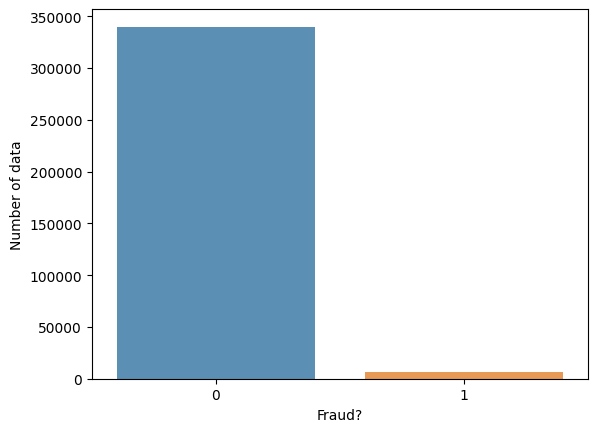

In [194]:
cnt_pro = data_new['isFraud'].value_counts()
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of data', fontsize=10)
plt.xlabel('Fraud?', fontsize=10);


Podemos ver que claramente las clases estan fuertemente desbalancedas, lo cual sugiera el uso de OverSampling para evitar que el modelo solo aprenda a detectar cuando no hay fraude.

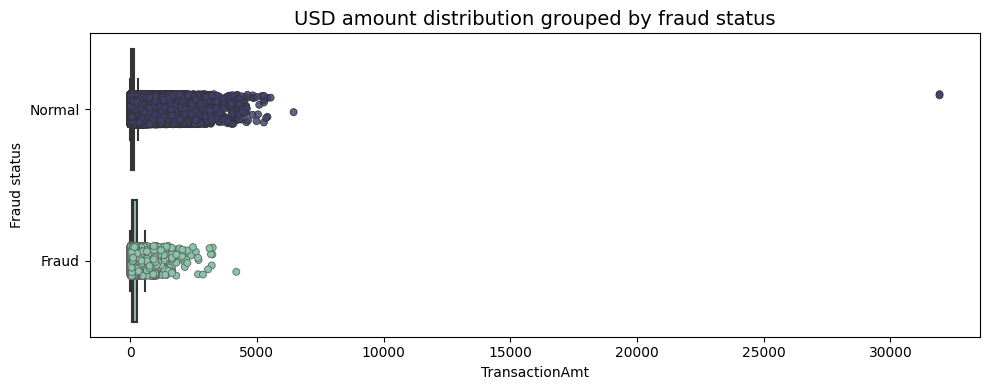

In [195]:
plt.figure(figsize=(10, 4))
sns.boxplot(y = 'isFraud', x = 'TransactionAmt', data = data_new, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'TransactionAmt', data = data_new, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['Normal', 'Fraud'])
plt.title('USD amount distribution grouped by fraud status',fontsize= 14)
plt.ylabel('Fraud status')
plt.tight_layout()

Vemos que existen valores atipicos, debido a la gran diferencia se decide borrarlos.

In [228]:
AMT_subset = data_new['TransactionAmt']
print(np.where(AMT_subset > 20000))

(array([143751, 143753], dtype=int64),)


In [249]:
data_new.head(143754)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,H,R,S,W,discover,mastercard,visa,credit,debit,debit or credit,anonymous.com,aol.com,att.net,bellsouth.net,cableone.net,centurylink.net,cfl.rr.com,charter.net,comcast.net,cox.net,earthlink.net,embarqmail.com,frontier.com,frontiernet.net,gmail,gmail.com,gmx.de,hotmail.co.uk,hotmail.com,hotmail.de,hotmail.es,hotmail.fr,icloud.com,juno.com,live.com,live.com.mx,live.fr,mac.com,mail.com,me.com,msn.com,netzero.com,netzero.net,optonline.net,outlook.com,outlook.es,prodigy.net.mx,protonmail.com,ptd.net,q.com,roadrunner.com,rocketmail.com,sbcglobal.net,sc.rr.com,servicios-ta.com,suddenlink.net,twc.com,verizon.net,web.de,windstream.net,yahoo.co.jp,yahoo.co.uk,yahoo.com,yahoo.com.mx,yahoo.de,yahoo.es,yahoo.fr,ymail.com,T
2,2987002,0,86469,59.000,4663,490.0,150.0,166.0,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2987003,0,86499,50.000,18132,567.0,150.0,117.0,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,94.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,135.000000,50.000000,1404.000000,790.000000,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.000000,0.0,0.0,0.0,50.000000,1404.000000,790.000000,0.000000,0.000000,0.000000,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,

In [250]:
data_new.drop([274336, 274339], inplace=True)

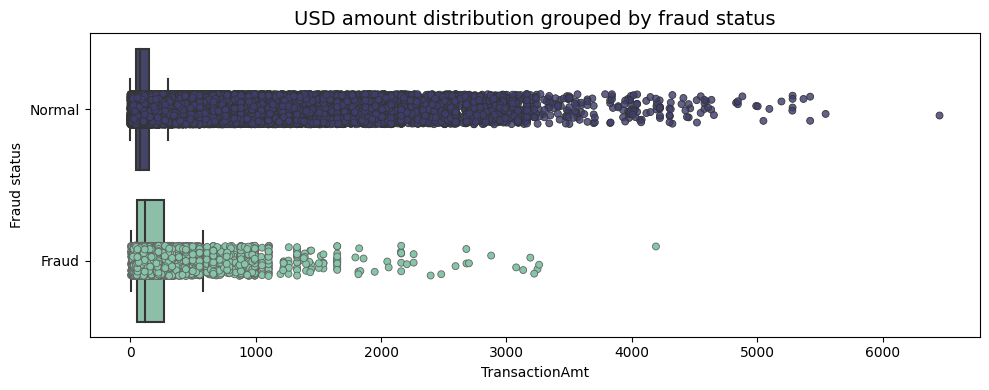

In [251]:
plt.figure(figsize=(10, 4))
sns.boxplot(y = 'isFraud', x = 'TransactionAmt', data = data_new, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'TransactionAmt', data = data_new, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['Normal', 'Fraud'])
plt.title('USD amount distribution grouped by fraud status',fontsize= 14)
plt.ylabel('Fraud status')
plt.tight_layout()

Tanto la media como el ultimo cuartil son ligeramente superiores para las transciones de fraude.

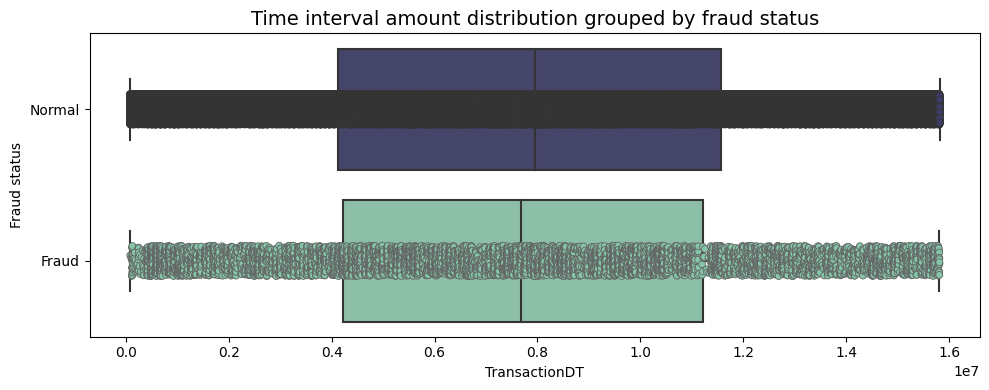

In [252]:
plt.figure(figsize=(10, 4))
sns.boxplot(y = 'isFraud', x = 'TransactionDT', data = data_new, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'TransactionDT', data = data_new, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['Normal', 'Fraud'])
plt.title('Time interval amount distribution grouped by fraud status',fontsize= 14)
plt.ylabel('Fraud status')
plt.tight_layout()

No hay diferencias significativas para ninguno de los dos grupos.

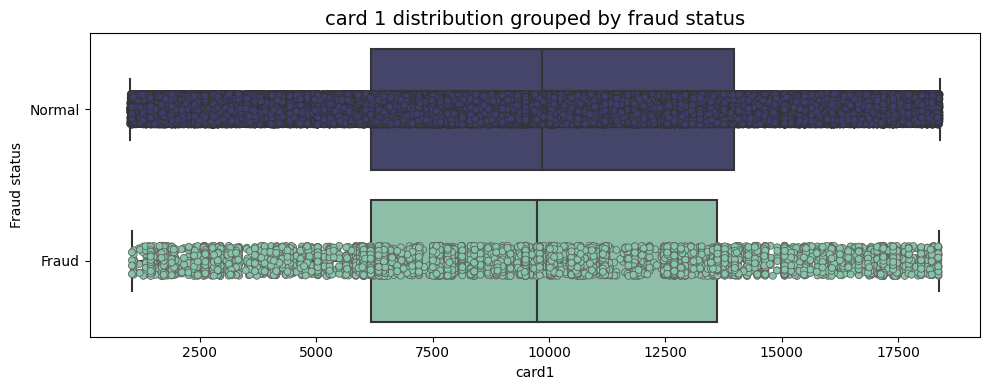

In [253]:
plt.figure(figsize=(10, 4))
sns.boxplot(y = 'isFraud', x = 'card1', data = data_new, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'card1', data = data_new, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['Normal', 'Fraud'])
plt.title('card 1 distribution grouped by fraud status',fontsize= 14)
plt.ylabel('Fraud status')
plt.tight_layout()

Las distribucciones son basicamente iguales.

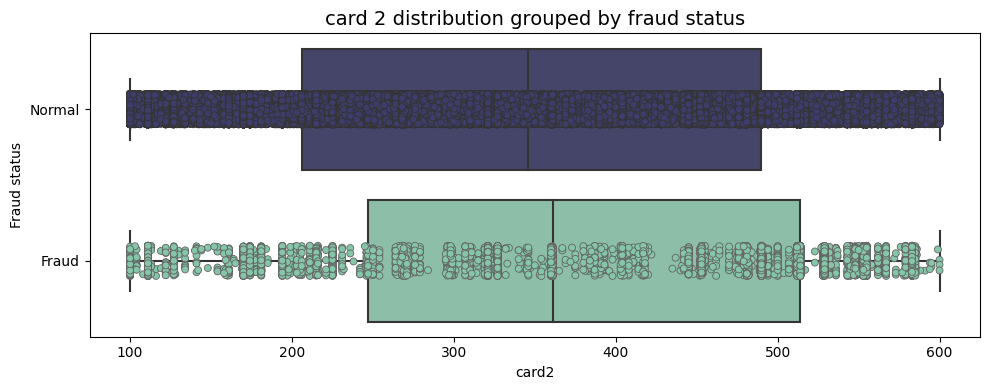

In [257]:
plt.figure(figsize=(10, 4))
sns.boxplot(y = 'isFraud', x = 'card2', data = data_new, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'card2', data = data_new, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['Normal', 'Fraud'])
plt.title('card 2 distribution grouped by fraud status',fontsize= 14)
plt.ylabel('Fraud status')
plt.tight_layout()

Los datos de fraude tiene una media ligeramente superior.

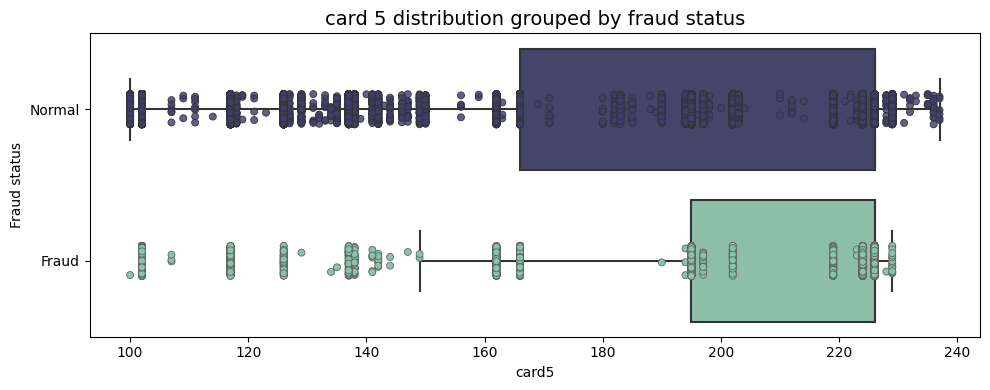

In [256]:
plt.figure(figsize=(10, 4))
sns.boxplot(y = 'isFraud', x = 'card5', data = data_new, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
sns.stripplot(y = 'isFraud', x = 'card5', data = data_new, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
plt.yticks( np.arange(2), ['Normal', 'Fraud'])
plt.title('card 5 distribution grouped by fraud status',fontsize= 14)
plt.ylabel('Fraud status')
plt.tight_layout()

Los fraudes presentan una variacion mucho menor en esta variable.

In [263]:
data_train.dropna(inplace=True)

ValueError: min() arg is an empty sequence

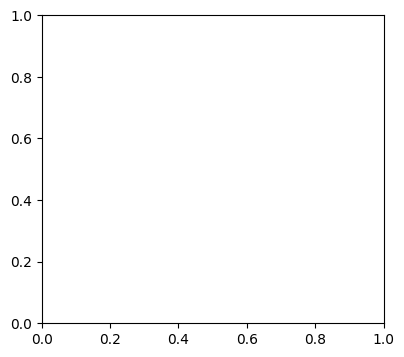

In [265]:

fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
sns.countplot(x = 'P_emaildomain', hue = 'isFraud', data = data_train, palette=["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('No. fraud/legal transaction by class')
plt.ylabel('Number of transaction')
plt.legend(( 'Fraud', 'Legal'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax2 = fig.add_subplot(132)
sns.countplot(x = 'card4', hue = 'isFraud', data = data_train, palette=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('No. fraud/legal transaction by class')
plt.ylabel('Number of transaction')
plt.legend(( 'Fraud', 'Legal'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax3 = fig.add_subplot(133)
sns.countplot(x = 'card6', hue = 'isFraud', data = data_train, palette=["#3f3e6fd1", "#85c6a9"], ax = ax3)
plt.title('No. fraud/legal transaction by class')
plt.ylabel('Number of transaction')
plt.legend(( 'Fraud', 'Legal'), loc=(1.04,0))
_ = plt.xticks(rotation=False)




In [258]:
data_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0